In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [79]:
CFD = pd.read_csv('CFD_Data_ST_CSV.csv')

In [80]:
CFD

,l/L,h/H,A2/A3,B,MEAN
0,0.70,0.4,0.6,40,0.657232
1,0.70,0.5,0.8,35,0.598116
2,0.70,0.6,1.0,30,0.554869
3,0.85,0.4,0.8,30,0.650732
4,0.85,0.5,1.0,40,0.572696
5,0.85,0.6,0.6,35,0.484434
6,1.00,0.4,1.0,35,0.670749
7,1.00,0.5,0.6,30,0.385328
8,1.00,0.6,0.8,40,0.482564


In [81]:
CFD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
l/L      9 non-null float64
h/H      9 non-null float64
A2/A3    9 non-null float64
B        9 non-null int64
MEAN     9 non-null float64
dtypes: float64(4), int64(1)
memory usage: 432.0 bytes


In [82]:
CFD.describe()

,l/L,h/H,A2/A3,B,MEAN
count,9.000000,9.000000,9.000000,9.000000,9.000000
mean,0.850000,0.500000,0.800000,35.000000,0.561858
std,0.129904,0.086603,0.173205,4.330127,0.096032
min,0.700000,0.400000,0.600000,30.000000,0.385328
25%,0.700000,0.400000,0.600000,30.000000,0.484434
50%,0.850000,0.500000,0.800000,35.000000,0.572696
75%,1.000000,0.600000,1.000000,40.000000,0.650732
max,1.000000,0.600000,1.000000,40.000000,0.670749


In [83]:
CFD.corr()

,l/L,h/H,A2/A3,B,MEAN
l/L,1.000000e+00,0.000000e+00,-3.854941e-18,0.000000e+00,-0.408181
h/H,0.000000e+00,1.000000e+00,-2.312965e-17,0.000000e+00,-0.686644
A2/A3,-3.854941e-18,-2.312965e-17,1.000000e+00,5.551115e-17,0.407794
B,0.000000e+00,0.000000e+00,5.551115e-17,1.000000e+00,0.182711
MEAN,-4.081810e-01,-6.866444e-01,4.077944e-01,1.827109e-01,1.000000


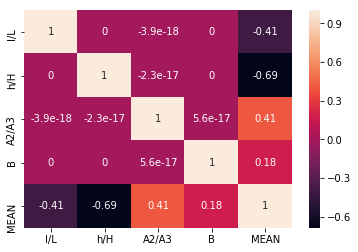

In [84]:
sns.heatmap(CFD.corr(),annot=True)

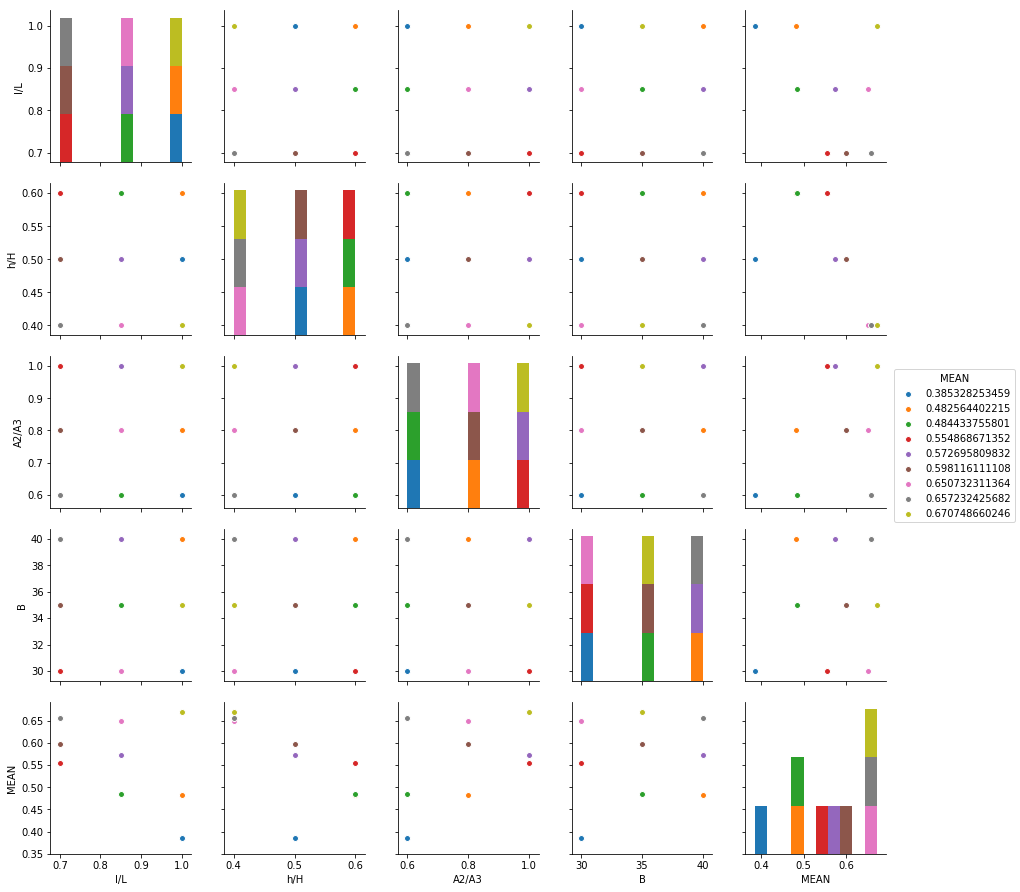

In [85]:
sns.pairplot(CFD,hue='MEAN')

/anaconda3/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


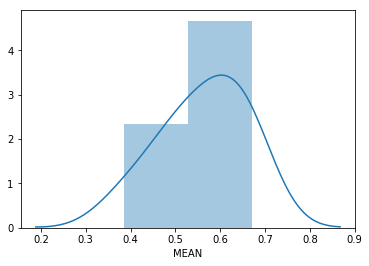

In [86]:
sns.distplot(CFD['MEAN'])

In [87]:
X = CFD[['l/L','h/H','A2/A3','B']]
y = CFD['MEAN']

## Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=3)

## Creating and Training the Model

In [90]:
from sklearn.linear_model import LinearRegression

In [91]:
lm = LinearRegression()

In [92]:
model=lm.fit(X_train,y_train)

## Model Evaluation

Let's evaluate the model by checking out it's coefficients and how we can interpret them.

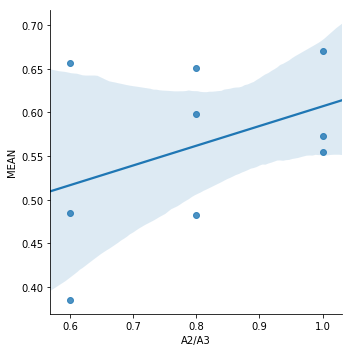

In [93]:
sns.lmplot(x='A2/A3',y='MEAN',data=CFD)

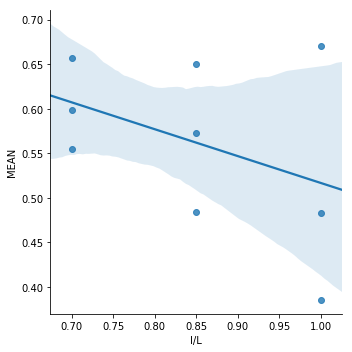

In [94]:
sns.lmplot(x='l/L',y='MEAN',data=CFD)

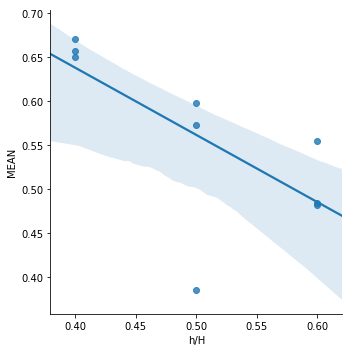

In [95]:
sns.lmplot(x='h/H',y='MEAN',data=CFD)

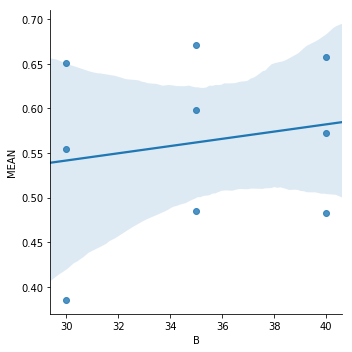

In [96]:
sns.lmplot(x='B',y='MEAN',data=CFD)

In [97]:
# print the intercept
print(lm.intercept_)

0.93256443077


In [98]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
l/L,-0.395444
h/H,-0.620871
A2/A3,0.155829
B,0.004052


In [99]:
predictions = lm.predict(X_test)

In [100]:
X_test

,l/L,h/H,A2/A3,B
6,1.0,0.4,1.0,35


In [101]:
predictions

array([ 0.58642481])

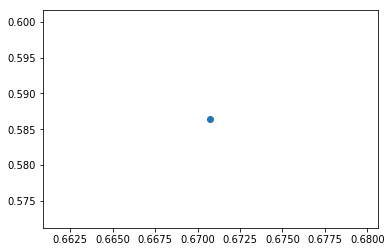

In [102]:
plt.scatter(y_test,predictions)

**Residual Histogram**

/anaconda3/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


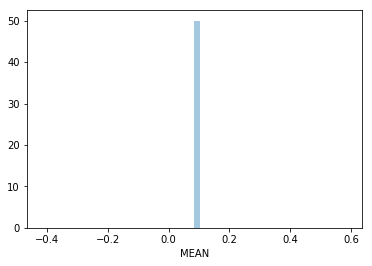

In [103]:
sns.distplot((y_test-predictions),bins=50);

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [104]:
from sklearn import metrics

In [105]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

('MAE:', 0.084323847963111764)
('MSE:', 0.0071105113353059878)
('RMSE:', 0.084323847963111764)


In [106]:
X_test_1 = pd.read_csv('CFD_Data_Test.csv')
X_Test_Gercek_MEAN=pd.read_csv('CFD_Data_DP_Test.csv')

In [107]:
X_test_1

,l/L,h/H,A2/A3,B
0,0.80,0.4,0.6,40
1,0.80,0.4,0.6,40
2,0.80,0.4,0.6,40
3,0.80,0.4,0.7,40
4,0.80,0.5,0.7,35
5,0.80,0.5,0.7,35
6,0.80,0.5,0.8,35
7,0.80,0.5,0.8,35
8,0.85,0.6,0.8,30
9,0.85,0.6,0.9,30


In [108]:
predictions1 = lm.predict(X_test_1)
predictions_MEAN_Gercek = lm.predict(X_Test_Gercek_DP)

In [109]:
predictions1

array([ 0.62344259,  0.62344259,  0.62344259,  0.6390255 ,  0.55667781,
        0.55667781,  0.57226071,  0.57226071,  0.47014082,  0.48572372,
        0.48572372,  0.48572372,  0.43921951,  0.43921951,  0.43921951,
        0.37688789,  0.51843881,  0.53402172,  0.4875175 ,  0.58414267,
        0.43946337,  0.43478571,  0.38828149,  0.44438553,  0.35915396,
        0.4830837 ,  0.43657948,  0.3698147 ,  0.528527  ,  0.39967509,
        0.39943059,  0.57970887,  0.37030306,  0.51006021,  0.46355599,
        0.31887669,  0.27237247,  0.43239018,  0.53032077,  0.50407713])

In [110]:
predictions_MEAN_Gercek

array([ 0.66298701,  0.61180513,  0.56062325,  0.59431506,  0.60391488,
        0.45923558,  0.58642481,  0.44174551,  0.45134533])

In [111]:
X_Test_Analize_Girecek=pd.read_csv('CFD_TEST_EN_DUSUK.csv')

In [112]:
X_Test_Analize_Girecek

,l/L,h/H,A2/A3,B
0,1.0,0.7,0.35,40
1,1.0,0.7,0.30,35


In [113]:
predictions_analize_girecek = lm.predict(X_Test_Analize_Girecek)

In [114]:
predictions_analize_girecek

array([ 0.31913514,  0.29108312])

In [117]:
lm.score(X,y)

0.77887449736285708

In [118]:
lm.intercept_

0.93256443076963635

In [119]:
lm.coef_

array([-0.39544416, -0.6208712 ,  0.15582905,  0.00405211])